In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
df.duplicated().sum()

1

In [33]:
# df.drop_duplicates(inplace=True)
df.duplicated().sum()

1

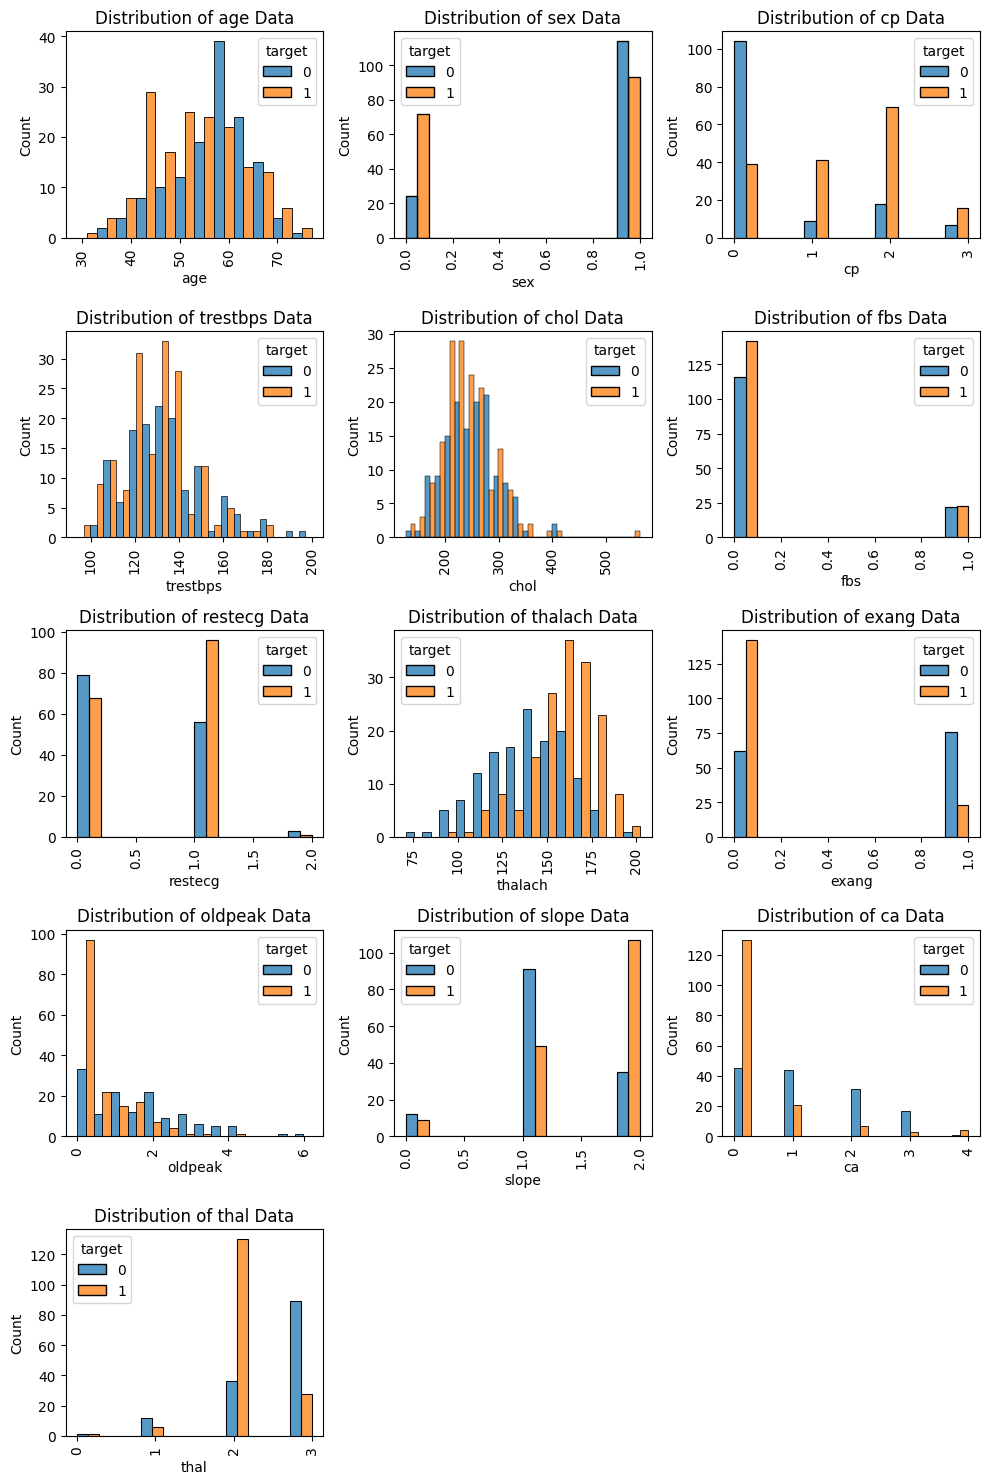

In [34]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col], hue = df["target"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [35]:
fig1 = px.sunburst(df, path = ["target", "sex"])
fig1.update_traces(textinfo = "label + percent parent")
fig1.update_layout(title_text = "which sex likely to take heart disease",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig1.show()

In [36]:
fig2 = px.sunburst(df, path = ["target", "cp"])
fig2.update_traces(textinfo = "label + percent parent")
fig2.update_layout(title_text = "Which chest pain related with heart disease?",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig2.show()

In [37]:
class LogisticRegression:
    def __init__(self,alpha = 0.1, iterations = 100):
        self.alpha = alpha
        self.iterations = iterations 
        self.weights = None
        self.bias = None
    def sigmoid(self, x):
        return 1 / (1 + (np.exp(-x)))
    def compute_loss(self, y_true, y_pred):
        combined = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        smallRange = 1e-7
        return -np.mean(combined * np.log(combined + smallRange))
    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self.sigmoid(z)
        return A
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for i in range(self.iterations):
            A = self.feed_forward(X)
            dz = A - y
            dw = (1 / samples) * np.dot(X.T, dz)
            db = (1 / samples) * np.sum(A - y)
            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db
    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.bias
        sigmoid_output = self.sigmoid(predictions)
        threshold = 0.5
        predicted_classes = [1 if output > threshold else 0 for output in sigmoid_output]
        return np.array(predicted_classes)

In [42]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("heart.csv")
X= df.drop("target",axis = 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(alpha=0.01, iterations=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(predictions, y_test)
precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = f1_score(predictions, y_test)

print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)
print("Test F1-score:", f1)

Test accuracy: 0.8852459016393442
Test precision: 0.90625
Test recall: 0.8787878787878788
Test F1-score: 0.8923076923076922


# Summary section

The data that is provided is about the heart disease and what effects this disease, as shown in the first figure the distributions of data with the label. and in figure 2 as illustrated both genders are likely to have heart disease. Especially, gender 1 has higher chance than gender 0. and CP2 has high chance of heart disease, but not CP1. CP3 seems to be not related with heart disease.
Then I tried to apply the mathematics of logistic regression by coding, as shown in the logistic regression class, so Ensuring the feed_forward function is correctly implemented was a bit difficult. The correctness of A = self.feed_forward(X) is important since it directly affects the gradient descent calculations and the model's performance.
But finally the results were well and satisfied for me, because the built in logistic regression got 88% accuracy with the same dataset. 
 